# Project: Brazil's Medical Appointment Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The Medical Appointment Data is based on information from a hundred thousand (100,000) medical appointments in Brazil and is focused on determining whether or not patients show up for their appointment. Specific details and characteristics are included for each patient, under different headers or columns. These columns are:

>● 01 - PatientId - Identification of a patient

>● 02 - AppointmentID - Identification of each appointment

>● 03 - Gender - Male or Female.

>● 04 - ScheduledDay - The day the patient booked or set up the appointment.
   
>● 05 - AppointmentDay - The day of the actual appointment, when they have to visit the doctor.
  
>● 06 - Age - The age of the patient.
   
>● 07 - Neighbourhood - this is the location of the hospital.

>● 08 - Scholarship - True or False. True = 1 means that they took part in the Brasilian welfare program Bolsa Família; False = 0 means that they did not take part in the Brasilian welfare program Bolsa Família. View added information [here]('https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia').

>● 09 - Hipertension - True or False. True = 1 means that they had hypertension; False = 0 means that they did not have hypertension.

>● 10 - Diabetes - True or False. True = 1 means that they had Daibetes; False = 0 means that they did not have Diabetes.

>● 11 - Alcoholism - True or False. True = 1 means that they had problems of Alcoholism; False = 0 means that they did not have problems of Alcoholism.

>● 12 - Handcap - True or False. True = 1 or above means that they were handicap, the value determining the different diabilities they have (eg, eye impairment, crippled, etc); False = 0 means that they were not handicap. View added information [here]('https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/29699#229356')

>● 13 - SMS_received - 1 means the patient received SMS; 0 means the patient did not receive any SMS.

>● 14 - No-show - Yes or No. According to original encoding, Yes means that they did not show up for the appointment and No means that they showed up for the appointment. this will be converted, so that 1 would mean they showed up, and 0 would mean that they didn't show up.


### Question(s) for Analysis
> Below are the questions that would be addressed over the course of the project report. The questions were derived after a critical view of the data set, as well as the available data attributed to the patient in relation to their appointments.

>**Question 1**: What is the relationship between the ages of the patients and their appointments?

>**Question 2**: What is the relationship between the gender of the patients and their appointments?

>**Question 3**: Is the location of the hospital associated with the appointment?

>**Question 4**: Do patients tend to miss their appointment when they don't receive reminders from the hospital?

>**Question 5**: Are patients liable to miss their appointments if they are not part of the welfare program (Bolsa Familia Scholarship)?

>**Question 6**: Is there a relationship between the patient's appointment day and them showing up for their appointments?

>**Question 7**: What is the relationship between the patient's ailment and the appointments?

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# For this project, I will be using NumPy, Pandas and MatPlotLib frameworks to wrangle and explore my dataset, as well as
# for aided visualisations of the results.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> The data set is loaded and various checks involving the dataframe, including the shape, information on it datatypes, null values as well as the summary statistics are carried out. the first few rows of the data frame is ran, to give an idea of how the dataframe is set up.

In [2]:
# load the no-show appointments dataset, and view the first 5 rows of the dataframe
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# check the shape of the data, find out how many appointments were recorded (rows), as well as the columns in the dataset
df.shape

(110527, 14)

In [4]:
# to check out the datatypyes and the presence of missing values (null values), using the info syntax. For easy access,
# rename all the columns into lower cases, and replace the hyphens with underscores.
df.rename(columns=lambda x: x.strip().lower().replace("-","_"), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> The info syntax shows that there are no missing values in the columns. However, the Scheduled Day and the Appointment Day columns are in the wrong datatype, so It is converted to the datetime format. Also, the patientid and appointmentid are in a wrong datattype as well, as the id are string values that identify the patient. The columns containing the illness and disability too should be string values to identify the disease of the patient. The 'no_show' column is converted to boolean, as it can only have two possible results (i.e true or false)

In [5]:
# converting the Scheduled Day and the Appointment Day columns to the datetime format
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [6]:
# converting the patientid and appointmentid to string format
df['patientid'] = df['patientid'].astype('str')
df['appointmentid'] = df['appointmentid'].astype('str')

In [7]:
# converting columns of illness and disability to string format
df['hipertension'] = df['hipertension'].astype('str')
df['diabetes'] = df['diabetes'].astype('str')
df['alcoholism'] = df['alcoholism'].astype('str')
df['handcap'] = df['handcap'].astype('str')

In [8]:
# to check the datatypes again using the .dtypes syntax.
df.dtypes

patientid                 object
appointmentid             object
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension              object
diabetes                  object
alcoholism                object
handcap                   object
sms_received               int64
no_show                   object
dtype: object

In [9]:
# to convert the 'Yes' to value 0 and the 'No' to value 1, rename no_show to show, and then convert the column to boolean,
df = df.replace(to_replace="No",value="1") # they showed up
df = df.replace(to_replace="Yes",value="0") # they did not show up
df['no_show'] = df['no_show'].astype(int)
df.rename(columns={'no_show':'show'}, inplace=True)

In [10]:
# to check the first five rows of the modified dataframe,
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,2.98724998243e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.58997776694e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.26296229995e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.84118644818e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [11]:
# to check the summary statistics,
df.describe()

,age,scholarship,sms_received,show
count,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.321026,0.798067
std,23.110205,0.297675,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000


> There are some flawed values in the age column, as is depicted by the minimum age value being negative. we can check more on this flawed values.

In [12]:
# to view the dataframe in ascending order of the age column,
df.sort_values(['age']).head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
99832,4.65943158731e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,1
34218,3.46943128195e+12,5649465,F,2016-05-03 06:57:26,2016-05-09,0,REDENÇÃO,0,0,0,0,0,0,0
102834,48826747693.0,5659726,F,2016-05-04 14:35:59,2016-06-01,0,MARUÍPE,0,0,0,0,0,1,1
102832,9.72684614837e+12,5749887,F,2016-05-31 08:19:38,2016-06-01,0,MARUÍPE,0,0,0,0,0,0,1
102830,2.84528967842e+13,5664173,M,2016-05-05 11:24:09,2016-06-08,0,SÃO CRISTÓVÃO,0,0,0,0,0,1,1


### Data Cleaning
Both the data set and the summary statistics above show some flaws within the dataset:
<li> 1. The appointmentid column is unneccessary for this dataset, as it only contains generated tags for the patients.
<li> 2. There are negative and zero age values within the dataset.
<li> 3. There is need to combine the various illnesses and disability into one single column that would contain them. This would allow us access all illnesses and disability without fear of omissions.
<li> 4. There are also some columns with misspelt names.

In [13]:
# drop the appointmentid column
df.drop(columns=['appointmentid'], inplace=True)

In [14]:
# replace negative and zero age by the mean of the age column
age_mean = df['age'].mean()
for index , age_value in df.iterrows():
    if age_value['age']<1:
        df.loc[index, 'age']= age_mean

In [15]:
# Running the summary statistics again,
df.describe()

,age,scholarship,sms_received,show
count,110527.000000,110527.000000,110527.000000,110527.000000
mean,38.276780,0.098266,0.321026,0.798067
std,22.104561,0.297675,0.466873,0.401444
min,1.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,1.000000
50%,37.088874,0.000000,0.000000,1.000000
75%,55.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000


In [16]:
# to check the shape of the modified data,
df.shape

(110527, 13)

In [17]:
# renaming the hipertension and handcap columns
df.rename(columns={'hipertension':'hypertension'}, inplace=True)
df.rename(columns={'handcap':'handicap'}, inplace=True)

In [18]:
# to replace the numbers with the names of the ailment
combining_columns = ['hypertension', 'diabetes', 'alcoholism', 'handicap']
x = ['1', '2', '3', '4']
for column in combining_columns:
    df[column] = df[column].replace('0', '')
    df[column] = df[column].replace(x, ' ' + column)

In [19]:
# to combine the hypertension, diabetes, alcoholism and handicap columns into one column, called ailment
df['ailment']= df['hypertension'] + df['diabetes'] + df['alcoholism'] + df['handicap']
df['ailment']= df['ailment'].str.lower().map(lambda x: x.strip().replace(' ','/'))

In [20]:
# drop the hypertension diabetes, alcoholism and handicap columns, since they've been combined into the ailment column
df.drop(columns=['hypertension', 'diabetes', 'alcoholism', 'handicap'], inplace=True)

In [21]:
# to replace the blank values in the ailment column with None, to signify no ailment,
df['ailment'] = df['ailment'].replace('', 'None')

In [22]:
# check for duplicate rows,
df.duplicated().sum()

618

In [23]:
# drop duplicate rows,
df.drop_duplicates(inplace=True)

In [24]:
# check if there are still duplicates left, check shape of the data set, and check summary statistics
print(df.duplicated().sum())
print(df.shape)
print(df.describe())
df.head()

0
(109909, 10)
                 age    scholarship   sms_received           show
count  109909.000000  109909.000000  109909.000000  109909.000000
mean       38.278019       0.098281       0.322831       0.798879
std        22.113239       0.297696       0.467561       0.400840
min         1.000000       0.000000       0.000000       0.000000
25%        20.000000       0.000000       0.000000       1.000000
50%        37.088874       0.000000       0.000000       1.000000
75%        55.000000       0.000000       1.000000       1.000000
max       115.000000       1.000000       1.000000       1.000000


,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,sms_received,show,ailment
0,2.98724998243e+13,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0,0,1,hypertension
1,5.58997776694e+14,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0,0,1,None
2,4.26296229995e+12,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0,0,1,None
3,867951213174.0,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,1,None
4,8.84118644818e+12,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0,0,1,hypertension/diabetes


<a id='eda'></a>
## Exploratory Data Analysis

> The research work seeks to analyse the Medical Appointment Data, based on information gotten from a hundred thousand (100,000) medical appointments in Brazil, as well as based on the exploration of six critical questions, with complete focus on determining whether or not patients showed up for their appointments.

In [25]:
# create a mask for the show column,
showed = df['show']==True # patients that showed up for their appointment (i.e show = 1).
missed = df['show']==False # patients that did not show up for their appointment (i.e. show = 0).

In [26]:
# create general function for bar chart. this bar chart function will serve for some of the bar chart within the
# exploratory data analysis (EDA),
def plot_bar(y, ticks, labels):
    x = list(np.arange(len(y)))
    plt.bar(x, y, tick_label = ticks)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])

In [27]:
# create function for bar chart with percentages. this bar chart function will serve for the bar charts within the EDA that carry percentages,
def plot_bar_percent(y, ticks, labels):
    x = list(np.arange(len(y)))
    plt.bar(x, y, tick_label = ticks)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    for xx,yy in zip(x,y):
        plt.text(xx, yy-20, str(yy)+'%', va='center', ha='center', color='white', weight='bold');

In [28]:
# create function for bar chart, that will serve for the bar charts within the EDA for grouped columns,
def plot_bar_group(y, ticks, labels):
    y.plot(kind='bar').set_xticklabels(label)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1]);

In [29]:
# create function for bar chart, that will serve for charts within the EDA for variables in stacked bars,
def plot_stacked_bar(x, y, labels):
    x.plot(kind='bar', alpha=0.5, figsize=(20,8), color='blue', label='Showed Up')
    y.plot(kind='bar', alpha=0.5, figsize=(20,8), color='red', label='Showed Up')
    plt.xlabel(labels[0], fontsize = 20)
    plt.ylabel(labels[1], fontsize = 20)
    plt.legend();

### Research Question 1 (What is the relationship between the ages of the patients and their appointments?)

In [30]:
# to verify the age ranges of the patients that scheduled appointments, the summary statistics is most effective
df['age'].describe()

count    109909.000000
mean         38.278019
std          22.113239
min           1.000000
25%          20.000000
50%          37.088874
75%          55.000000
max         115.000000
Name: age, dtype: float64

> From the output above, there are 109909 age values, with the minimum age being 1 year and the maximum age being 115 years. Going forward, we can look at the distribution of the ages.

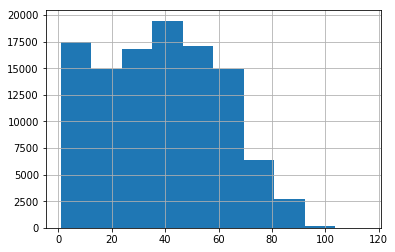

In [31]:
df['age'].hist();

> The Histogram above shows that there were more appointments scheduled by patients that were 60 or younger. we can also discuss and visualise the relationship between the ages and the appointments.

In [32]:
# to deduce the average ages for the patients that showed up and those that did not show up for their appointments
df.age[showed].mean(), df.age[missed].mean()


(39.015549301204516, 35.348451662459212)

> thus, an average age of patients that showed up for their appointments is 39, while the average age for those that did not show up is 35. This shows that there wasn't much of a difference between the ages of patients that showed up and those that missed their appointments. this can be further visualised by bar chart shown below.

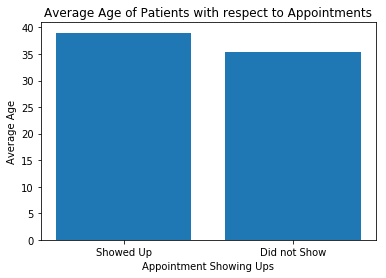

In [33]:
y = [df.age[showed].mean(), df.age[missed].mean()]
ticks = ['Showed Up', 'Did not Show']
labels = ['Appointment Showing Ups','Average Age']
plot_bar(y, ticks, labels)
plt.title('Average Age of Patients with respect to Appointments');

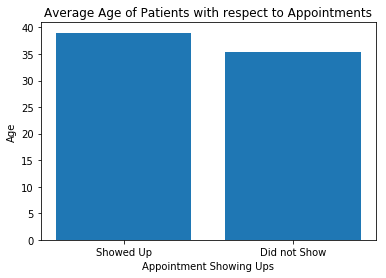

In [34]:
# to plot a bar chart showing these values,
x = [0,1]
y = [df.age[showed].mean(), df.age[missed].mean()]
label = ['Showed Up', 'Did not Show']
plt.bar(x, y, tick_label=label)
plt.xlabel('Appointment Showing Ups')
plt.ylabel('Age')
plt.title('Average Age of Patients with respect to Appointments');


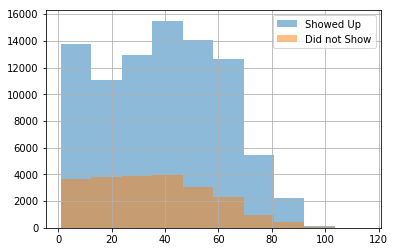

In [35]:
df.age[showed].hist(alpha=0.5, label='Showed Up')
df.age[missed].hist(alpha=0.5, label='Did not Show')
plt.legend();

> From the Histogram above, we can infer that the patients generally showed up for their appointments more times than they missed, with the most misses coming from patients that were age 40 or lesser. Thus, older patients tend to keep their appointments more than their younger counterparts.

### Research Question 2 (What is the relationship between the gender of the patients and their appointments?)

In [36]:
df.groupby('gender')['show'].count()

gender
F    71424
M    38485
Name: show, dtype: int64

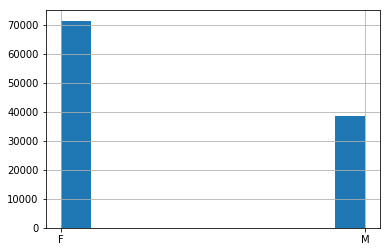

In [37]:
df['gender'].hist();

In [38]:
gender_show_count = df.groupby(['gender', 'show'])['patientid'].count()
gender_show_count.head()


gender  show
F       0       14458
        1       56966
M       0        7647
        1       30838
Name: patientid, dtype: int64

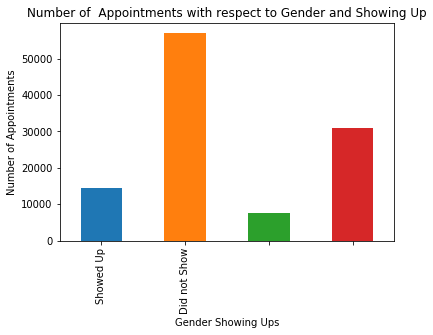

In [39]:
y = gender_show_count
ticks = ['Females that Did not Show Up', 'Females that Showed Up', 'Males that Did not Show Up', 'Males that Showed Up']
labels = ['Gender Showing Ups', 'Number of Appointments']
plot_bar_group(y, ticks, labels)
plt.title('Number of  Appointments with respect to Gender and Showing Up');

From the outputs and Histogram above, we can clearly infer that the appointments of female patients (71424) were more than those of male patients (38485). In fact, a large majority of the appointments for female patients and male students were still kept (56966 and 30838 respectively), as against a lesser amount of appointments that were missed by female and male patients (14458 and 7647 respectively).

In [40]:
gender_mean = df.groupby('gender').mean()
gender_mean

,age,scholarship,sms_received,show
gender,,,,
F,39.785222,0.123306,0.338850,0.797575
M,35.480814,0.051838,0.293101,0.801299


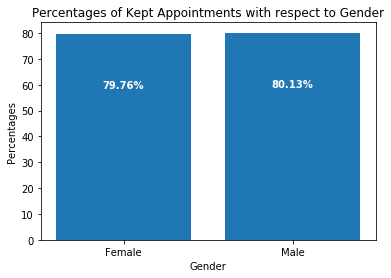

In [41]:
# to plot a bar chart showing the percentages of kept appointments, with respect to gender,
gender_percentage = (gender_mean['show']*100).round(2)
y = gender_percentage
ticks = ['Female', 'Male']
labels = ['Gender','Percentages']
plot_bar_percent(y, ticks, labels)
plt.title('Percentages of Kept Appointments with respect to Gender');

> Thus, we see that 79.76% of the appointments from the female patients were kept, and 80.13% from the male patients. This indicates there was no significant difference between both genders as regards to showing up for their appointments.

### Research Question 3  (Is the location of the hospital associated with the appointment?)

In [42]:
# to show how many appointments were kept or missed by neighbourhood,
df.neighbourhood[showed].count(), df.neighbourhood[missed].count()

(87804, 22105)

In [43]:
# to check the values per each neighbourhood,
location_count = df.groupby(['neighbourhood', 'show'])['patientid'].count()
location_count.head()

neighbourhood    show
AEROPORTO        0          1
                 1          7
ANDORINHAS       0        497
                 1       1697
ANTÔNIO HONÓRIO  0         50
Name: patientid, dtype: int64

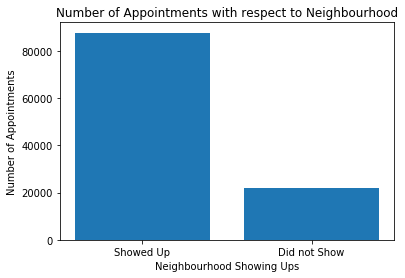

In [44]:
y = [df.neighbourhood[showed].count(), df.neighbourhood[missed].count()]
ticks = ['Showed Up', 'Did not Show']
labels = ['Neighbourhood Showing Ups','Number of Appointments']
plot_bar(y, ticks, labels)
plt.title('Number of Appointments with respect to Neighbourhood');

> From the output above, 87804 patient appointments were kept in all the neighbourhoods, while a total of 22105 appointments were missed. This shows a strong indication that the patients within these neighbourhoods had a tendency to keep their appointment schedules.

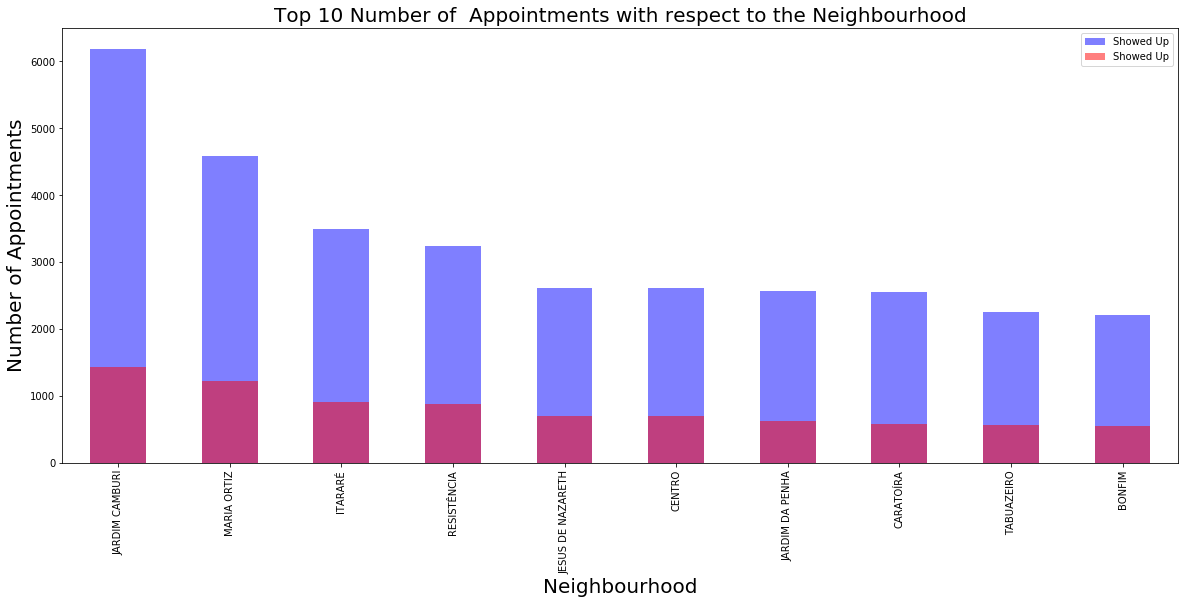

In [45]:
x = df.neighbourhood[showed].value_counts().head(10)
y = df.neighbourhood[missed].value_counts().head(10)
labels = ['Neighbourhood', 'Number of Appointments']
plot_stacked_bar(x, y, labels)
plt.title('Top 10 Number of  Appointments with respect to the Neighbourhood', fontsize=20);

> From the Bar Chart above, we can infer that the patients in each of the top 10 neighbourhood generally showed up for their appointments more times than they missed, with each of those neghbourhoods having more completed appointments than missed appointments.

### Research Question 4  (Do patients tend to miss their appointment when they don't receive reminders from the hospital?)

In [46]:
# to check the number of appointments with respect to sms received,
sms_count = df.groupby('sms_received')['patientid'].count()
sms_count

sms_received
0    74427
1    35482
Name: patientid, dtype: int64

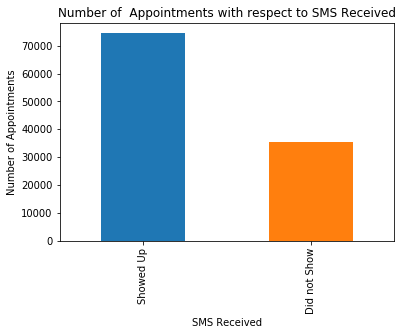

In [47]:
y = sms_count
ticks = ['No SMS', 'Received SMS']
labels = ['SMS Received', 'Number of Appointments']
plot_bar_group(y, ticks, labels)
plt.title('Number of  Appointments with respect to SMS Received');

In [48]:
# to check the number of appointments missed or kept, based on the sms received by the patients,
sms_show_count = df.groupby(['sms_received', 'show'])['patientid'].count()
sms_show_count.head()

sms_received  show
0             0       12321
              1       62106
1             0        9784
              1       25698
Name: patientid, dtype: int64

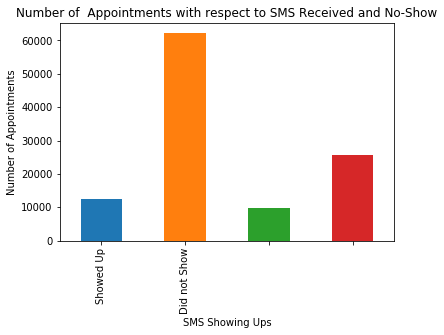

In [49]:
y = sms_show_count
ticks = ['No SMS, Did not Show', 'No SMS, Showed Up', 'Received SMS, Did not Show', 'Received SMS, Showed Up']
labels = ['SMS Showing Ups', 'Number of Appointments']
plot_bar_group(y, ticks, labels)
plt.title('Number of  Appointments with respect to SMS Received and No-Show');

> From the outputs and Bar Chart above, we can clearly infer that the appointments of patients that did not receive any sms message (74427) were more than those of patients that received the sms (35482). In fact, a large majority of the appointments (62106) for patients who didn't receive any text message were still kept, as against a lesser amount of appointments that were missed(12321).

In [50]:
# to find the average of patients who did or did not receive SMS,
sms_mean = df.groupby('sms_received').mean()
sms_mean

,age,scholarship,show
sms_received,,,
0,38.195347,0.098042,0.834455
1,38.451432,0.098782,0.724255


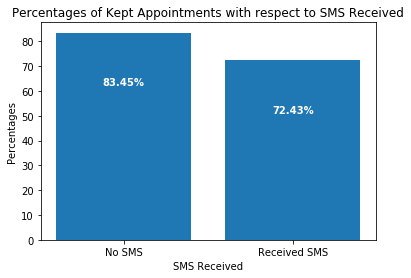

In [51]:
# to plot a bar chart showing the percentages of kept appointments, with respect to the SMS received,
sms_percentage = (sms_mean['show']*100).round(2)
sms_percentage = (sms_mean['show']*100).round(2)
y = sms_percentage
ticks = ['No SMS', 'Received SMS']
labels = ['SMS Received','Percentages']
plot_bar_percent(y, ticks, labels)
plt.title('Percentages of Kept Appointments with respect to SMS Received');

> Thus, we see that 83.45% of the appointments from the patients who didn't receive SMS were kept, as against 72.43% from those who received SMS. This indicates hugely that the patients do not tend to miss their appointments even when they don't receive SMS from the hospital.

### Research Question 5 (Are patients liable to miss their appointments if they are not part of the welfare program (Bolsa Familia Scholarship)?)

In [52]:
# to check the number of appointments with respect to the Bolsa Familia Scholarship,
scholarship_count = df.groupby('scholarship')['patientid'].count()
scholarship_count

scholarship
0    99107
1    10802
Name: patientid, dtype: int64

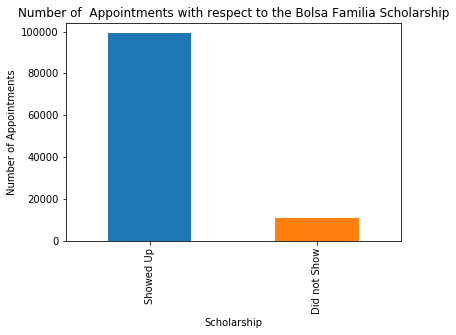

In [53]:
y = scholarship_count
ticks = ['No Scholarship', 'Scholarship']
labels = ['Scholarship', 'Number of Appointments']
plot_bar_group(y, ticks, labels)
plt.title('Number of  Appointments with respect to the Bolsa Familia Scholarship');

In [54]:
# to check the number of appointments missed or kept, by patients who were or were not part of the welfare program,
scholarship_show_count = df.groupby(['scholarship', 'show'])['patientid'].count()
scholarship_show_count.head()

scholarship  show
0            0       19548
             1       79559
1            0        2557
             1        8245
Name: patientid, dtype: int64

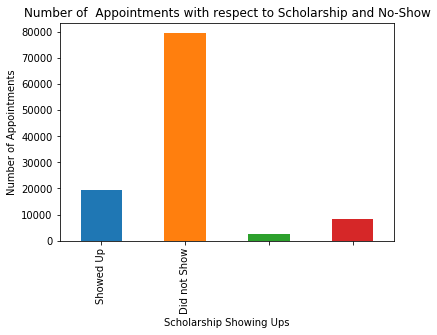

In [55]:
y = scholarship_show_count
ticks = ['No Scholarship, Did not Show', 'No Scholarship, Showed Up', 'Scholarship, Did not Show', 'Scholarship, Showed Up']
labels = ['Scholarship Showing Ups', 'Number of Appointments']
plot_bar_group(y, ticks, labels)
plt.title('Number of  Appointments with respect to Scholarship and No-Show');

> From the outputs and Bar Charts above, we can clearly infer that the appointments of patients that were not part of the welfare program (99107) were more than those of patients that were part of the program (10802). In fact, a huge majority of the appointments (79559) for patients who that were not part of the welfare program were still kept, as against a lesser amount of appointments that were missed(19548).

In [56]:
# to find the average of patients who were or were not part of the welfare program,
scholarship_mean = df.groupby('scholarship').mean()
scholarship_mean

,age,sms_received,show
scholarship,,,
0,39.094122,0.322651,0.802759
1,30.790374,0.324477,0.763285


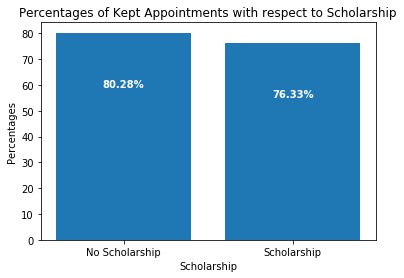

In [57]:
# to plot a bar chart showing the percentages of kept appointments, with respect to the Bolsa Familia Scholarship,
scholarship_percentage = (scholarship_mean['show']*100).round(2)
y = scholarship_percentage
ticks = ['No Scholarship', 'Scholarship']
labels = ['Scholarship','Percentages']
plot_bar_percent(y, ticks, labels)
plt.title('Percentages of Kept Appointments with respect to Scholarship');

> Thus, we see that 80.28% of the appointments from the patients who weren't part of the scholarship were kept, as against 76.33% from those who were part of the scholarship. This indicates hugely that the patients are not liable to miss their appointments even when they aren't part of the Bolsa Familia Welfare Program.

### Research Question 6 (Is there a relationship between the patient's appointment day and them showing up for their appointments?)

In [58]:
# to query the number of appointments where the scheduled day and the appointment day were same,
same_day = df[df['scheduledday'].dt.date == df['appointmentday'].dt.date]
same_day['patientid'].count()

38495

In [59]:
# to query the number of appointments where the scheduled day and the appointment day were different,
diff_day = df[df['scheduledday'].dt.date != df['appointmentday'].dt.date]
diff_day['patientid'].count()

71414

In [60]:
# to deduce if patients, who had their scheduled day the same day as their appointment day, kept their appointments,
same_day_mean = same_day['show'].mean()
same_day_mean

0.95368229640213009

In [61]:
# to deduce if patients, who had their scheduled day on a different day to their appointment day, kept their appointments,
diff_day_mean = diff_day['show'].mean()
diff_day_mean

0.71543394852549924

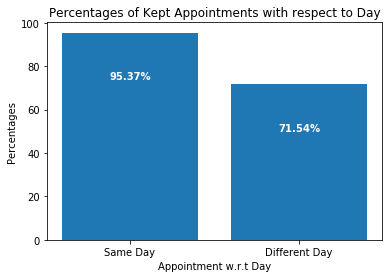

In [62]:
# to plot a bar chart showing the percentages of kept appointments, with respect to the day of appointment,
same_day_percentage = (same_day_mean*100).round(2)
diff_day_percentage = (diff_day_mean*100).round(2)
y = [same_day_percentage, diff_day_percentage]
ticks = ['Same Day', 'Different Day']
labels = ['Appointment w.r.t Day','Percentages']
plot_bar_percent(y, ticks, labels)
plt.title('Percentages of Kept Appointments with respect to Day');

> From the outputs and chart above, 95.37% of the appointments for patients who had the same scheduled and appointment day were kept, as against 71.54% from those who their appointment on a different day from the day they scheduled. This indicates hugely that patients who had their appointments on the same day as their scheduled day were more committed to keeping their appointments than those who had their appointments on a different day.

### Research Question 7 (What is the relationship between the patient's ailment and the appointments?)

In [63]:
# to show how many appointments were kept or missed by ailment,
df.ailment[showed].count(), df.ailment[missed].count()

(87804, 22105)

In [64]:
# to determine how many classifications of ailments are within the ailment column,
print(df['ailment'].nunique())
df['ailment'].unique()

16


array(['hypertension', 'None', 'hypertension/diabetes', 'diabetes',
       'hypertension/alcoholism', 'alcoholism', 'diabetes/alcoholism',
       'hypertension/handicap', 'handicap',
       'hypertension/diabetes/handicap',
       'hypertension/diabetes/alcoholism',
       'hypertension/alcoholism/handicap', 'diabetes/handicap',
       'alcoholism/handicap', 'hypertension/diabetes/alcoholism/handicap',
       'diabetes/alcoholism/handicap'], dtype=object)

In [65]:
# to check the values per each ailment class,
ailment_count = df.groupby('ailment')['patientid'].count()
ailment_count

ailment
None                                         83648
alcoholism                                    1917
alcoholism/handicap                             33
diabetes                                      1333
diabetes/alcoholism                             74
diabetes/alcoholism/handicap                     1
diabetes/handicap                               40
handicap                                      1185
hypertension                                 13595
hypertension/alcoholism                       1034
hypertension/alcoholism/handicap                29
hypertension/diabetes                         5846
hypertension/diabetes/alcoholism               243
hypertension/diabetes/alcoholism/handicap       13
hypertension/diabetes/handicap                 343
hypertension/handicap                          575
Name: patientid, dtype: int64

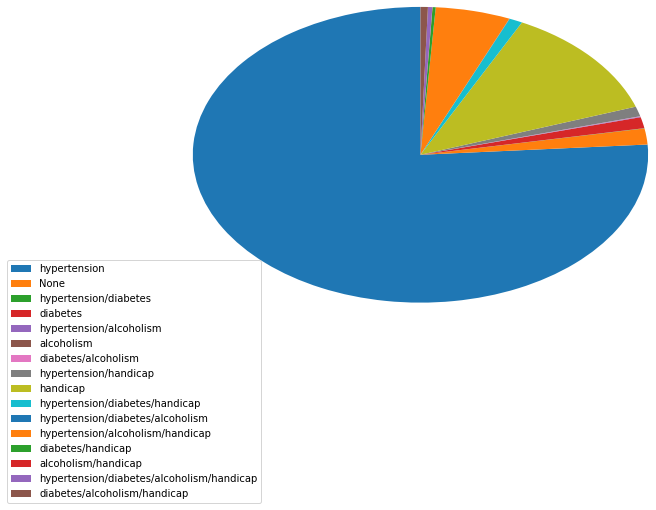

In [66]:
# to visualise the value sets in the earlier set,
plt.pie(ailment_count, startangle=90, radius=1.7)
plt.xlabel('')
plt.ylabel('')
plt.legend(df['ailment'].unique()[0:], loc="upper right", bbox_to_anchor=(0.04,0.04));

In [67]:
# to check the values of appointments missed or kept, per each ailment,
ailment_show_count = df.groupby(['ailment', 'show'])['patientid'].count()
ailment_show_count.head()

ailment              show
None                 0       17441
                     1       66207
alcoholism           0         412
                     1        1505
alcoholism/handicap  0           4
Name: patientid, dtype: int64

In [68]:
# to discover the percentages of each ailment count in relation to the total count,
total_count = df.ailment.count()
ailment_show_prop = ((ailment_show_count/total_count))
ailment_show_percent = (ailment_show_prop*100).round(2)
ailment_show_percent.head()

ailment              show
None                 0       15.87
                     1       60.24
alcoholism           0        0.37
                     1        1.37
alcoholism/handicap  0        0.00
Name: patientid, dtype: float64

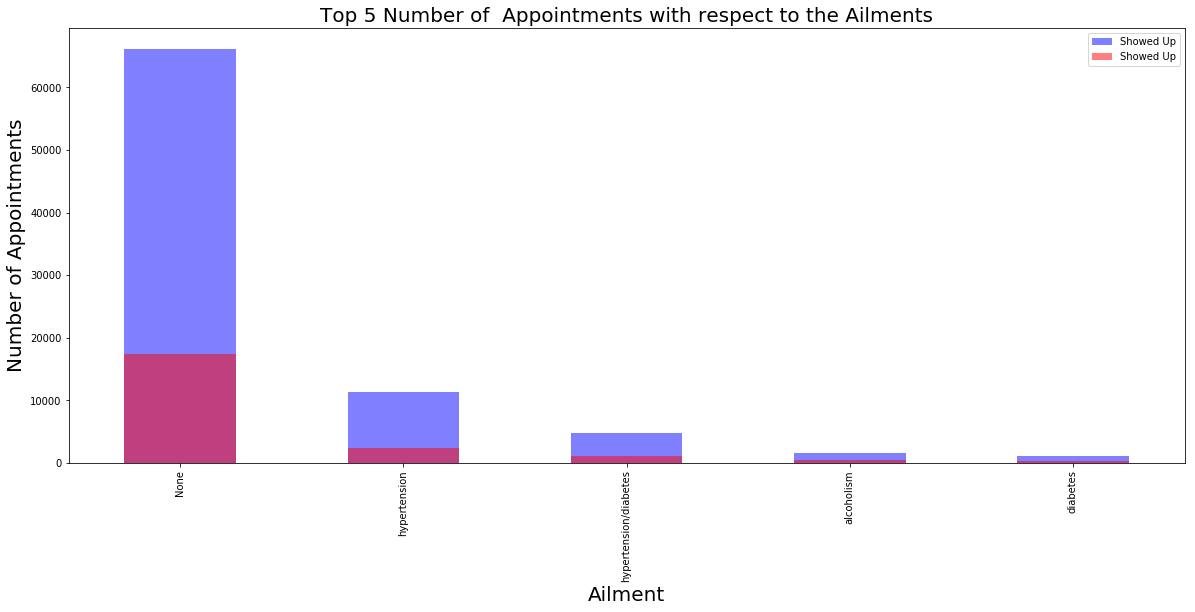

In [69]:
x = df.ailment[showed].value_counts().head(5)
y = df.ailment[missed].value_counts().head(5)
labels = ['Ailment', 'Number of Appointments']
plot_stacked_bar(x, y, labels)
plt.title('Top 5 Number of  Appointments with respect to the Ailments', fontsize=20);

> From the outputs, the Pie Chart and Bar Chart above, we can infer that the patients who had no recorded ailment had the highest number of appointments booked (83648), with them also showing up for most of those appointments (60.24%). In general, the patients showed up for more appointments than they missed, regardless of the ailment or ailments they faced.

<a id='conclusions'></a>
## Conclusions

The research work sought to analyse the Medical Appointment Data, based on information gotten from a hundred thousand medical appointments in Brazil. The focus was to determine whether or not patients showed up for their appointment. To acheive this, a total of seven research questions were explored and analysed, after rigourous cleanliness of the dataset.
> For the first research question, it was realised that the age didn't necessarily imply that an appointment would be kept or missed, owing to the close values in the average ages for completed appointments and missed appointments. In the range of missed appointments, younger patients (less than 40) missed more than older patients.

> For the second research queston, it was deduced that there was no significant difference between both genders as regards to showing up for their appointments. This was strengthened by the fact that 79.76% of the appointments from the female patients were kept, and 80.13% from the male patients, showing a high tendency to show up for their appointments from both genders. 

> For the third research question, it was realised that patients in each neighbourhood generally showed up for their appointments more times than they missed, with each of those neghbourhoods having more completed appointments than missed appointments. There was a vastly greater amount of completed appointments than missed appointments, further strengthening the fact that the location did not determine if the patients would show up for their appointments.

> For the fourth research queston, it was realised that the patients do not tend to miss their appointments even when they don't receive SMS from the hospital. This was strengthened by the fact that even though most of the appointments were actually made by patients who didn't end up receiving SMS, majority of those appointments were still completed on their specific appointment days, with 83.45% appointment completion rate from these patients.

> For the fifth research question, it was dicovered that there was a high percentage of completed appointments for patients both part of the scholarship or not. With 80.28% of the appointments from the patients who weren't part of the scholarship being completed, and 76.33% completed appointment percentage from those who were part of the scholarship. This indicates hugely that the patients are not liable to miss their appointments even when they aren't part of the Bolsa Familia Welfare Program.

> For the sixth research question, there was a great indication that patients showed up for their appointments more if it fell on the same day as the day they scheduled the appointment. This was visualised, with 95.37% of the appointments for patients who had the same scheduled and appointment day being completed, and 71.54% from those who their appointment on a different day from the day they scheduled. This hugely supports the fact that patients who had their appointments on the same day as their scheduled day were more committed to keeping their appointments than those who had their appointments on a different day.

> For the seventh research question, we discovered that the patients who had no recorded ailment had the highest number of appointments booked (83648), with them also showing up for most of the appointments in the entire dataset(60.24%). For the patients who had one ailment or the other, they still showed up for more appointments than they missed, pointing to the fact that there were no major hindrances in keeping to the appointments caused by the ailments.

    

The research work was analysed within the clear bounds of descriptive statistical tools including the Histogram, Pie Chart, and the Bar Chart. As such, the results are limited, since there was no further explorations through Inferential methods of hypothesis and tests.

The findings of this research work was realised independently from the dataset available, and without any interaction with the patients through means of survey, questionnaires or otherwise. Thus, the findings of this research are to be considered viable based on the data available through the data set, and not based on ever evolving parameters that would arise from an interaction with the patients, the hospital staffs, the welfare program coordinators, etc.


In [70]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Arikewuyo_Medical_Dataset.ipynb'])

0